In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.express as px

In [2]:
df = pd.read_excel('EPL_20_21.xlsx')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


- Name: Player name
- Club: Club name
- Nationality: nationality of the player
- Position: position played by the player
- Age: age of the player
- Matches: total matches in one season
- Starts: played as a starting eleven
- Mins: total minutes played
- Goals: total goals
- Assists: total assists
- Passes_Attempted: total passes attempted
- Perc_Passes_Completed: success percentage of passes
- Penalty_Goals: goals by penalty kick
- Penalty_Attempted: total penalty attempted
- xG: expected number of goals
- xA: expected number of assits
- Yellow_Cards: total yellow cards
- Red_Cards: total red cards

# Question
1. Top 10 Scorer
2. Top 10 Assist
3. Top 10 Club by points
4. Top 10 Club by goals
5. Top 10 Passes Completed + Passes Attempted
6. Top 10 Player with most time played (minutes) + Top 10 Player with most playing game
7. Top 10 Player as starting elevn
8. Penalty Attempted : Penalty Goals
9. Most yellow cards and most red cards by club
10. Most yellow cards and most red cards by player
11. Top 10 Nationality of Player in EPL
12. Central Tendency of Age
13. Most position of player in EPL


## 1. Top 10 Scorer

Text(0.5, 1.0, 'Top Scorer')

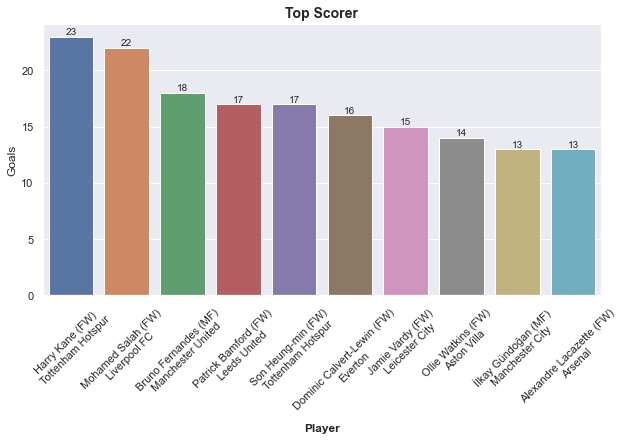

In [3]:
df_top_10_scorer = df.sort_values(by=['Goals'], ascending=False)[['Name', 'Club', 'Goals', 'Position']][:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_top_10_scorer['Name'] + ' (' + df_top_10_scorer['Position'] + ') ' +'\n' + df_top_10_scorer['Club'], y=df_top_10_scorer['Goals'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Player', fontweight='bold', fontsize=12)
plt.title('Top Scorer', fontweight='bold', fontsize=14)

In [4]:
px.bar(df_top_10_scorer, x='Name', y='Goals')

## 2. Top 10 Assist

Text(0.5, 1.0, 'Top Assists')

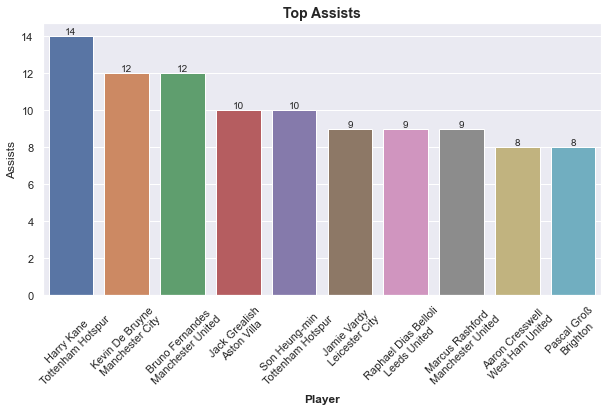

In [5]:
df_assists = df.sort_values(by=['Assists'], ascending=False)[['Name', 'Club', 'Assists']][:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_assists['Name'] + '\n'+ df_assists['Club'], y=df_assists['Assists'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Player', fontweight='bold', fontsize=12)
plt.title('Top Assists', fontweight='bold', fontsize=14)

## 3. Top 10 Club by Goals

Text(0.5, 1.0, 'Top Goals by Club')

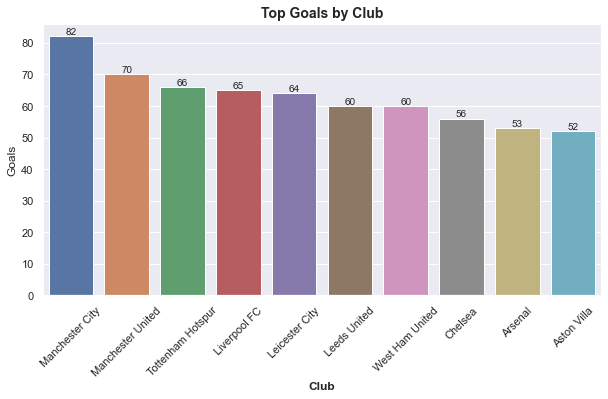

In [6]:
df_club = df.groupby(by=['Club']).sum()
df_club_by_goals = df_club.sort_values(by=('Goals'), ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_club_by_goals.index, y=df_club_by_goals['Goals'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Club', fontweight='bold', fontsize=12)
plt.title('Top Goals by Club', fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'Top Assists by Club')

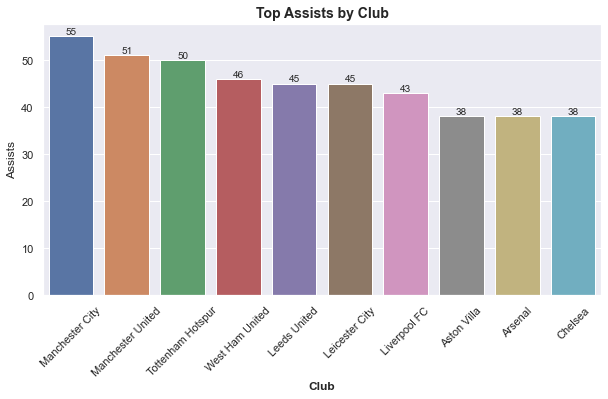

In [7]:
df_club_by_as = df_club.sort_values(by=('Assists'), ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_club_by_as.index, y=df_club_by_as['Assists'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Club', fontweight='bold', fontsize=12)
plt.title('Top Assists by Club', fontweight='bold', fontsize=14)

## 4. Top 10 Passes Completed + Passes Attempted

Text(0.5, 1.0, 'Most Passes by Players')

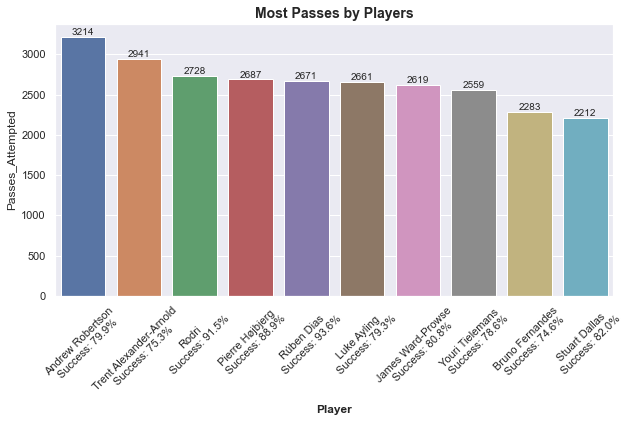

In [8]:
df_passes = df.sort_values(by=['Passes_Attempted'], ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_passes['Name'] + "\n Success: " + df_passes['Perc_Passes_Completed'].astype(str) + "%", y=df_passes['Passes_Attempted'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Player', fontweight='bold', fontsize=12)
plt.title('Most Passes by Players', fontweight='bold', fontsize=14)

## 5. Top 10 Player with most time played + game/matches

Text(0.5, 1.0, 'Most Time Played by Players')

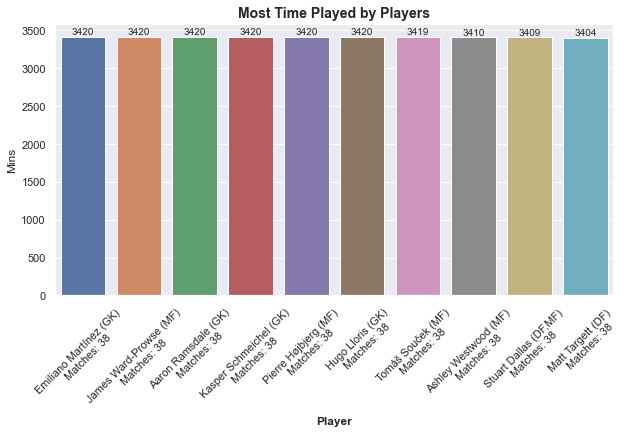

In [9]:
time = df.sort_values(by=['Mins'], ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=time['Name'] + " (" + time['Position'] + ") \n Matches: " + time['Matches'].astype(str), y=time['Mins'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Player', fontweight='bold', fontsize=12)
plt.title('Most Time Played by Players', fontweight='bold', fontsize=14)

## 6. Penalty Attempted : Penalty Goals

Text(0.5, 1.0, 'Penalty by Player (Attempts and Success)')

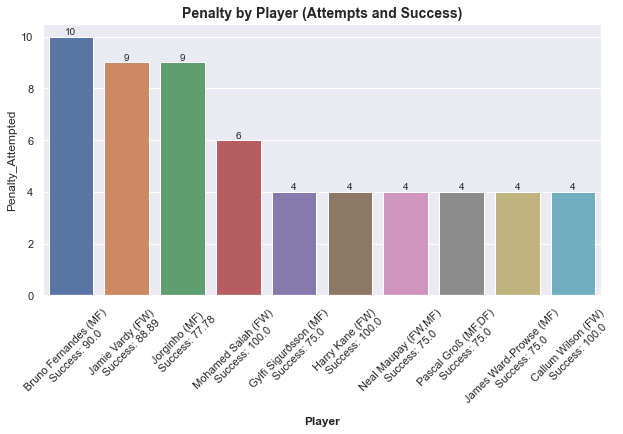

In [10]:
df['Penalty_Success_Perc'] = df['Penalty_Goals'] / df['Penalty_Attempted'] * 100
df_penalty = df.sort_values(by=['Penalty_Attempted'], ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_penalty['Name'] + " (" + df_penalty['Position'] + ") \n Success: " + round(df_penalty['Penalty_Success_Perc'], 2).astype(str), y=df_penalty['Penalty_Attempted'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Player', fontweight='bold', fontsize=12)
plt.title('Penalty by Player (Attempts and Success)', fontweight='bold', fontsize=14)

## 7. Most yellow cards and most red cards by club

Text(0.5, 1.0, 'Yellow Cards by Club')

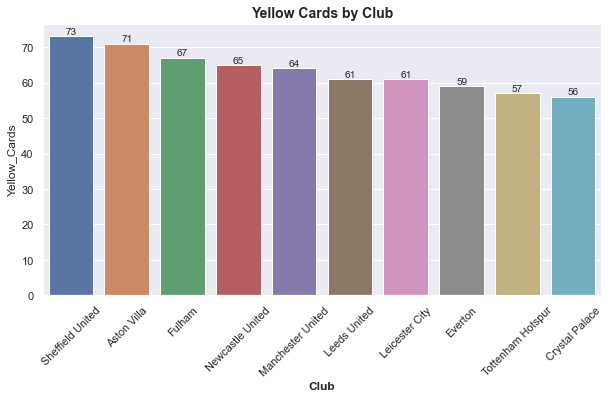

In [11]:
df_club_yellow = df_club.sort_values(by=['Yellow_Cards'], ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_club_yellow.index, y=df_club_yellow['Yellow_Cards'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Club', fontweight='bold', fontsize=12)
plt.title('Yellow Cards by Club', fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'Yellow Cards by Club')

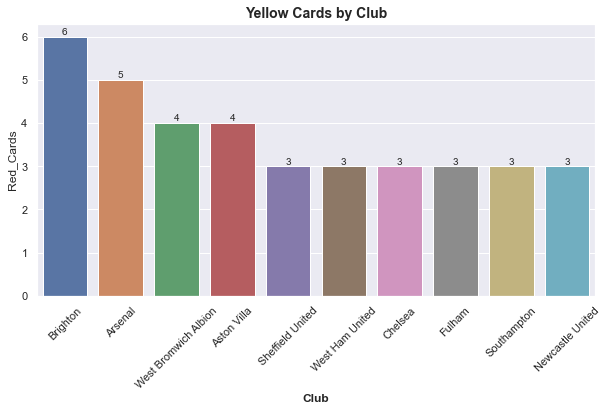

In [12]:
df_club_red = df_club.sort_values(by=['Red_Cards'], ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_club_red.index, y=df_club_red['Red_Cards'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Club', fontweight='bold', fontsize=12)
plt.title('Yellow Cards by Club', fontweight='bold', fontsize=14)

## 8. Most yellow cards and most red cards by player

Text(0.5, 1.0, 'Yellow Cards by Player')

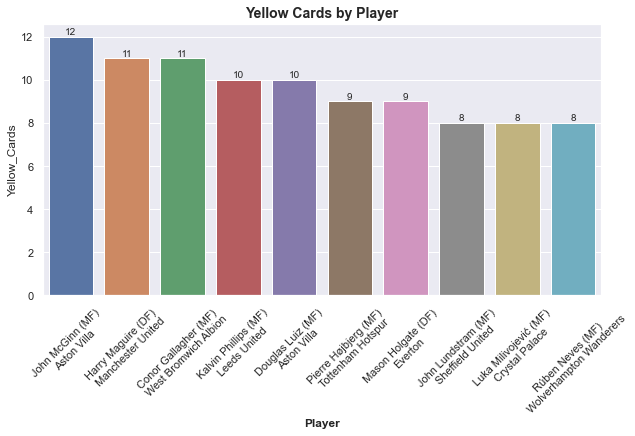

In [13]:
df_player_yellow = df.sort_values(by=['Yellow_Cards'], ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_player_yellow['Name'] + ' (' + df_player_yellow['Position'] + ') ' +'\n' + df_player_yellow['Club'], y=df_player_yellow['Yellow_Cards'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Player', fontweight='bold', fontsize=12)
plt.title('Yellow Cards by Player', fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'Red Cards by Player')

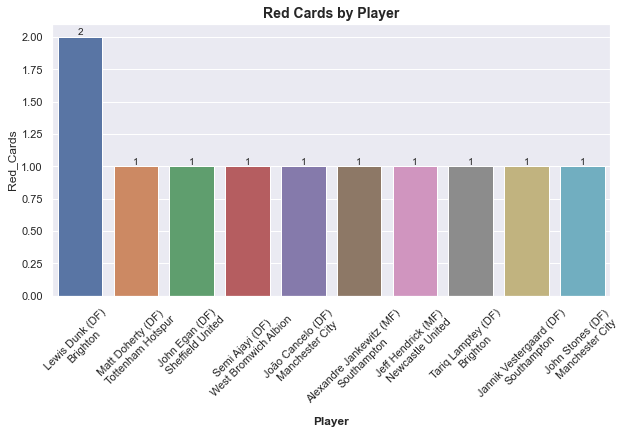

In [14]:
df_player_yellow = df.sort_values(by=['Red_Cards'], ascending=False)[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_player_yellow['Name'] + ' (' + df_player_yellow['Position'] + ') ' +'\n' + df_player_yellow['Club'], y=df_player_yellow['Red_Cards'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Player', fontweight='bold', fontsize=12)
plt.title('Red Cards by Player', fontweight='bold', fontsize=14)

## 9. Top 10 Nationality

Text(0.5, 1.0, 'Nationality of Player in EPL')

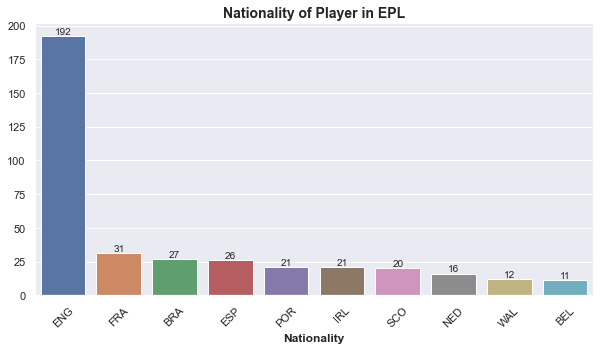

In [15]:
df_nat = df['Nationality'].value_counts()[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_nat.index, y=df_nat.values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Nationality', fontweight='bold', fontsize=12)
plt.title('Nationality of Player in EPL', fontweight='bold', fontsize=14)

## 10. Central Tendency of Age

Mean: 25.5
Median: 26.0


<Figure size 720x360 with 0 Axes>

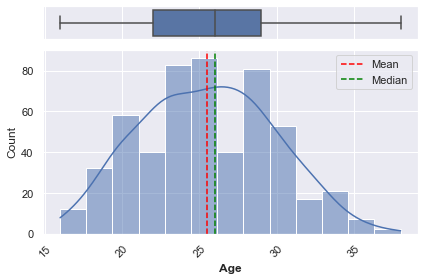

In [23]:
plt.figure(figsize=(10, 5))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x=df['Age'], ax=ax_box)
# sns.swarmplot(x=df[el], ax=ax_box)
sns.histplot(x=df['Age'], ax=ax_hist, kde=True)
plt.axvline(x=df['Age'].mean(), color='red', ls='--', label="Mean")
plt.axvline(x=df['Age'].median(), color='green', ls='--', label='Median')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
ax_box.set(xlabel='')
plt.xlabel('Age', fontweight='bold', fontsize=12)
plt.tight_layout()

print(f"Mean: {df['Age'].mean()}")
print(f"Median: {df['Age'].median()}")

## 11. Most position in EPL

Text(0.5, 1.0, 'Positions')

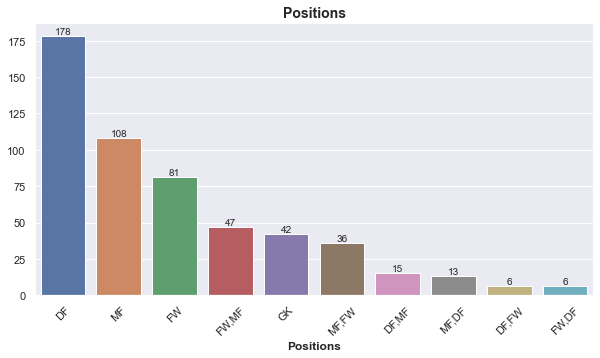

In [26]:
df_pos = df['Position'].value_counts()[:10]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_pos.index, y=df_pos.values)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.xlabel('Positions', fontweight='bold', fontsize=12)
plt.title('Positions', fontweight='bold', fontsize=14)